# Load Dataset

In [1]:
from datasets import get_dataset_config_names
from datasets import load_dataset

configs = get_dataset_config_names("SQuADDS/SQuADDS_DB")

In [2]:
configs

['qubit-TransmonCross-cap_matrix',
 'cavity_claw-RouteMeander-eigenmode',
 'coupler-NCap-cap_matrix']

### Load an example TransmonCross device from the database

In [3]:
qubit_data = load_dataset("SQuADDS/SQuADDS_DB", configs[0])
qubit_data

DatasetDict({
    train: Dataset({
        features: ['sim_results', 'design', 'notes', 'contributor', 'sim_options'],
        num_rows: 1934
    })
})

In [4]:
example_xmon_device = qubit_data["train"][0]
example_xmon_device

{'sim_results': {'claw_to_claw': 94.97421,
  'claw_to_ground': 90.86585,
  'cross_to_claw': 3.73363,
  'cross_to_cross': 158.40783,
  'cross_to_ground': 158.40783,
  'ground_to_ground': 311.2559,
  'units': 'nH'},
 'design': {'design_options': {'aedt_hfss_capacitance': 0,
   'aedt_hfss_inductance': 9.686e-09,
   'aedt_q3d_capacitance': 0,
   'aedt_q3d_inductance': 1e-08,
   'chip': 'main',
   'connection_pads': {'c': {'claw_cpw_length': '40um',
     'claw_cpw_width': '10um',
     'claw_gap': '5.1um',
     'claw_length': '160um',
     'claw_width': '15um',
     'connector_location': '90',
     'connector_type': '0',
     'ground_spacing': '10um'}},
   'cross_gap': '30um',
   'cross_length': '310um',
   'cross_width': '30um',
   'gds_cell_name': 'my_other_junction',
   'hfss_capacitance': 0,
   'hfss_inductance': 9.686e-09,
   'hfss_mesh_kw_jj': 7e-06,
   'hfss_resistance': 0,
   'layer': '1',
   'orientation': '-90',
   'pos_x': '-1500um',
   'pos_y': '1200um',
   'q3d_capacitance': 0,


### Load an example Cavity Claw (CoupledLineTee + RouteMeander CPW + TransmonClaw) device from the database

In [5]:
cavity_claw_data = load_dataset("SQuADDS/SQuADDS_DB", configs[1])
cavity_claw_data

DatasetDict({
    train: Dataset({
        features: ['sim_options', 'sim_results', 'design', 'contributor', 'notes'],
        num_rows: 234
    })
})

In [6]:
example_cavity_claw_device = cavity_claw_data["train"][0]
example_cavity_claw_device

{'sim_options': {'setup': {'basis_order': 1,
   'max_delta_f': 0.05,
   'max_passes': 50,
   'min_converged': 1,
   'min_converged_passes': 2,
   'min_freq_ghz': 1,
   'min_passes': 1,
   'n_modes': 1,
   'name': 'Setup',
   'pct_refinement': 30,
   'reuse_selected_design': True,
   'reuse_setup': True,
   'vars': {'Cj': '0fF', 'Lj': '0nH'}},
  'simulator': 'Ansys HFSS'},
 'sim_results': {'cavity_frequency': 5353549772.64,
  'kappa': 161106.5984292,
  'units': 'Hz'},
 'design': {'coupler_type': 'CLT',
  'design_options': {'claw_opts': {'connection_pads': {'readout': {'claw_cpw_length': '0um',
      'claw_cpw_width': '11.7um',
      'claw_gap': '5.1um',
      'claw_length': '220um',
      'claw_width': '15um',
      'connector_location': '90',
      'connector_type': '0',
      'ground_spacing': '4.1um'}},
    'orientation': '-90',
    'pos_x': '-1500um'},
   'cplr_opts': {'coupling_length': '350um',
    'coupling_space': '7.9um',
    'down_length': '50um',
    'open_termination': False

### Load an example CapNInterdigital (Interdigitated Capacitor) device from the database

In [7]:
capn_data = load_dataset("SQuADDS/SQuADDS_DB", configs[2])
capn_data

DatasetDict({
    train: Dataset({
        features: ['sim_results', 'design', 'notes', 'contributor', 'sim_options'],
        num_rows: 430
    })
})

In [8]:
example_capn_device = capn_data["train"][0]
example_capn_device

{'sim_results': {'bottom_to_bottom': 12.78614,
  'bottom_to_ground': 12.09846,
  'ground_to_ground': 58.45017,
  'top_to_bottom': 0.51663,
  'top_to_ground': 14.95437,
  'top_to_top': 15.65491,
  'units': 'nH'},
 'design': {'coupler_type': 'NCap',
  'design_options': {'cap_distance': '50.9um',
   'cap_gap': '2.1um',
   'cap_gap_ground': '5.1um',
   'cap_width': '4.9um',
   'finger_count': '1',
   'finger_length': '25.9um',
   'orientation': '-90',
   'prime_gap': '5.1um',
   'prime_width': '11.7um',
   'second_gap': '5.1um',
   'second_width': '11.7um'},
  'design_tool': 'qiskit-metal'},
 'notes': {},
 'contributor': {'PI': 'Eli Levenson-Falk, PhD',
  'date_created': '2023-11-09-011049',
  'group': 'LFL',
  'institution': 'USC',
  'uploader': 'Andre Kuo'},
 'sim_options': {'setup': {'auto_increase_solution_order': 'False',
   'enabled': True,
   'freq_ghz': 5.0,
   'max_passes': 15,
   'min_converged_passes': 2,
   'min_passes': 2,
   'name': 'lom_setup',
   'percent_error': 0.1,
   'p

# Simulate the Example Device

### Import `utils.py` and `objects.py` which contain the simulator code

In [15]:
from objects import *
from utils import *

### Import `qiskit metal` and create design

In [16]:
%load_ext autoreload
%autoreload 2
from qiskit_metal import draw, Dict, designs, MetalGUI
from qiskit_metal.toolbox_metal import math_and_overrides
import qiskit_metal as metal

design = metal.designs.design_planar.DesignPlanar()
gui = metal.MetalGUI(design)
design.overwrite_enabled = True

### Simulate the example TransmonCross device

In [11]:
# Get the geometry Dict from our example device Dict
geometry_xmon_dict = example_xmon_device["design"]["design_options"]
geometry_xmon_dict

{'aedt_hfss_capacitance': 0,
 'aedt_hfss_inductance': 9.686e-09,
 'aedt_q3d_capacitance': 0,
 'aedt_q3d_inductance': 1e-08,
 'chip': 'main',
 'connection_pads': {'c': {'claw_cpw_length': '40um',
   'claw_cpw_width': '10um',
   'claw_gap': '5.1um',
   'claw_length': '160um',
   'claw_width': '15um',
   'connector_location': '90',
   'connector_type': '0',
   'ground_spacing': '10um'}},
 'cross_gap': '30um',
 'cross_length': '310um',
 'cross_width': '30um',
 'gds_cell_name': 'my_other_junction',
 'hfss_capacitance': 0,
 'hfss_inductance': 9.686e-09,
 'hfss_mesh_kw_jj': 7e-06,
 'hfss_resistance': 0,
 'layer': '1',
 'orientation': '-90',
 'pos_x': '-1500um',
 'pos_y': '1200um',
 'q3d_capacitance': 0,
 'q3d_inductance': '10nH',
 'q3d_mesh_kw_jj': 7e-06,
 'q3d_resistance': 0}

In [12]:
# Get the simulation parameters from our example device Dict
sim_options_xmon_dict = example_xmon_device["sim_options"]
sim_options_xmon_dict

{'renderer_options': {'Cj': 0,
  'Lj': '10nH',
  '_Rj': 0,
  'design_name': None,
  'max_mesh_length_jj': '7um',
  'max_mesh_length_port': '7um',
  'plot_ansys_fields_options': {'AdjacentSidePlot': 'False',
   'FullModelPlot': 'False',
   'IntrinsicVar': "Phase='0deg'",
   'PlotFolder': 'E Field',
   'PlotGeomInfo_0': '1',
   'PlotGeomInfo_1': 'Surface',
   'PlotGeomInfo_2': 'FacesList',
   'PlotGeomInfo_3': '1',
   'QuantityName': 'Mag_E',
   'StreamlinePlot': 'False',
   'UserSpecifyFolder': '0',
   'UserSpecifyName': '0',
   'name': 'NAME:Mag_E1'},
  'project_name': None,
  'project_path': None,
  'wb_offset': '0um',
  'wb_size': 5,
  'wb_threshold': '400um',
  'x_buffer_width_mm': 0.2,
  'y_buffer_width_mm': 0.2},
 'setup': {'auto_increase_solution_order': True,
  'enabled': True,
  'freq_ghz': 5.0,
  'max_passes': 30,
  'min_converged_passes': 1,
  'min_passes': 2,
  'name': 'sweep_setup',
  'percent_error': 0.1,
  'percent_refinement': 30,
  'reuse_selected_design': False,
  'reu

the parameters ['run'] are unsupported, so they have been ignored
{'pos_x': '-1500um', 'pos_y': '1200um', 'orientation': '-90', 'chip': 'main', 'layer': '1', 'connection_pads': {'c': {'connector_type': '0', 'claw_length': '160um', 'ground_spacing': '10um', 'claw_width': '15um', 'claw_gap': '5.1um', 'claw_cpw_length': '40um', 'claw_cpw_width': '10um', 'connector_location': '90'}}, 'cross_width': '30um', 'cross_length': '310um', 'cross_gap': '30um', 'hfss_inductance': 9.686e-09, 'hfss_capacitance': 0, 'hfss_resistance': 0, 'hfss_mesh_kw_jj': 7e-06, 'q3d_inductance': '10nH', 'q3d_capacitance': 0, 'q3d_resistance': 0, 'q3d_mesh_kw_jj': 7e-06, 'gds_cell_name': 'my_other_junction', 'aedt_q3d_inductance': 1e-08, 'aedt_q3d_capacitance': 0, 'aedt_hfss_inductance': 9.686e-09, 'aedt_hfss_capacitance': 0}


INFO 11:08PM [connect_design]: 	Opened active design
	Design:    LOMv2.0_q3d11 [Solution type: Q3D]
WARNING 11:08PM [connect_setup]: 	No design setup detected.
WARNING 11:08PM [connect_setup]: 	Creating Q3D default setup.
INFO 11:08PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)


<COMObject GetModule>


INFO 11:08PM [get_setup]: 	Opened setup `sweep_setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 11:08PM [analyze]: Analyzing setup sweep_setup
INFO 11:10PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmputl7qpgw.txt, C, , sweep_setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 11:10PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmp0r97zo2f.txt, C, , sweep_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 11:10PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpjlm697qd.txt, C, , sweep_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 11:10PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmp8z04b96w.txt, C, , sweep_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 11:10PM [get_matrix]: Exporting matrix dat

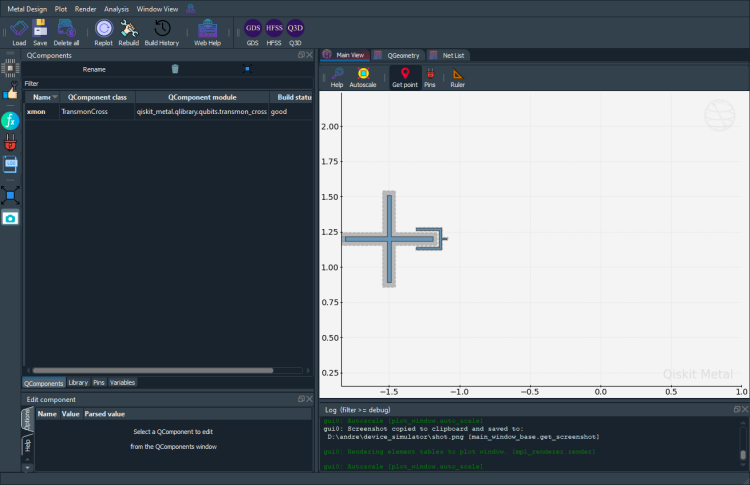

{'design': {'design_options': {'pos_x': '-1500um',
   'pos_y': '1200um',
   'orientation': '-90',
   'chip': 'main',
   'layer': '1',
   'connection_pads': {'c': {'connector_type': '0',
     'claw_length': '160um',
     'ground_spacing': '10um',
     'claw_width': '15um',
     'claw_gap': '5.1um',
     'claw_cpw_length': '40um',
     'claw_cpw_width': '10um',
     'connector_location': '90'}},
   'cross_width': '30um',
   'cross_length': '310um',
   'cross_gap': '30um',
   'hfss_inductance': 9.686e-09,
   'hfss_capacitance': 0,
   'hfss_resistance': 0,
   'hfss_mesh_kw_jj': 7e-06,
   'q3d_inductance': '10nH',
   'q3d_capacitance': 0,
   'q3d_resistance': 0,
   'q3d_mesh_kw_jj': 7e-06,
   'gds_cell_name': 'my_other_junction',
   'aedt_q3d_inductance': 1e-08,
   'aedt_q3d_capacitance': 0,
   'aedt_hfss_inductance': 9.686e-09,
   'aedt_hfss_capacitance': 0},
  'design_tool': 'Qiskit Metal'},
 'sim_options': {'sim_type': 'lom',
  'setup': {'name': 'sweep_setup',
   'reuse_selected_design':

In [14]:
results_df = simulate_single_design(design, gui, geometry_xmon_dict, sim_options_xmon_dict)
results_df

### Simulate the example CavityClaw device

In [15]:
# Get the geometry Dict from our example device Dict
geometry_cavityclaw_dict = example_cavity_claw_device["design"]["design_options"]
geometry_cavityclaw_dict

{'claw_opts': {'connection_pads': {'readout': {'claw_cpw_length': '0um',
    'claw_cpw_width': '11.7um',
    'claw_gap': '5.1um',
    'claw_length': '220um',
    'claw_width': '15um',
    'connector_location': '90',
    'connector_type': '0',
    'ground_spacing': '4.1um'}},
  'orientation': '-90',
  'pos_x': '-1500um'},
 'cplr_opts': {'coupling_length': '350um',
  'coupling_space': '7.9um',
  'down_length': '50um',
  'open_termination': False,
  'orientation': '-90',
  'prime_gap': '5.1um',
  'prime_width': '11.7um',
  'second_gap': '5.1um',
  'second_width': '11.7um'},
 'cpw_opts': {'fillet': '49.9um',
  'lead': {'end_straight': None,
   'start_jogged_extension': None,
   'start_straight': '50um'},
  'meander': {'asymmetry': '-175.0um', 'spacing': '100um'},
  'pin_inputs': {'end_pin': {'component': 'claw', 'pin': 'readout'},
   'start_pin': {'component': 'cplr', 'pin': 'second_end'}},
  'total_length': '4700um',
  'trace_gap': '5.1um',
  'trace_width': '11.7um'}}

In [16]:
# Get the simulation parameters from our example device Dict
sim_options_cavityclaw_dict = example_cavity_claw_device["sim_options"]
sim_options_cavityclaw_dict

{'setup': {'basis_order': 1,
  'max_delta_f': 0.05,
  'max_passes': 50,
  'min_converged': 1,
  'min_converged_passes': 2,
  'min_freq_ghz': 1,
  'min_passes': 1,
  'n_modes': 1,
  'name': 'Setup',
  'pct_refinement': 30,
  'reuse_selected_design': True,
  'reuse_setup': True,
  'vars': {'Cj': '0fF', 'Lj': '0nH'}},
 'simulator': 'Ansys HFSS'}

INFO 11:23PM [connect_project]: Connecting to Ansys Desktop API...
INFO 11:23PM [load_ansys_project]: 	Opened Ansys App
INFO 11:23PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 11:23PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/lfl/Documents/Ansoft/
	Project:   Project52


Starting the Simulation


INFO 11:23PM [connect_design]: 	Opened active design
	Design:    CavitySweep_hfss [Solution type: Eigenmode]
INFO 11:23PM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 11:23PM [connect]: 	Connected to project "Project52" and design "CavitySweep_hfss" 😀 

INFO 11:23PM [connect_design]: 	Opened active design
	Design:    CavitySweep22 [Solution type: Eigenmode]
WARNING 11:23PM [connect_setup]: 	No design setup detected.
WARNING 11:23PM [connect_setup]: 	Creating eigenmode default setup.
INFO 11:23PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


the parameters ['min_converged_passes'] are unsupported, so they have been ignored


INFO 11:23PM [connect_design]: 	Opened active design
	Design:    CavitySweep_hfss [Solution type: Eigenmode]


creaing porst
Sim rendered into HFSS!
{'mesh1': {'objects': ['prime_cpw_cplr', 'second_cpw_cplr', 'trace_cpw', 'readout_connector_arm_claw'], 'MaxLength': '7um'}}
pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path D:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path D:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


INFO:Global:Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


pyaedt INFO: Project Project52 set to active.


INFO:Global:Project Project52 set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 11:24PM [__del__]: Disconnected from Ansys HFSS
INFO 11:24PM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 11:24PM [analyze]: Analyzing setup test_setup
11:26PM 23s INFO [get_f_convergence]: Saved convergences to d:\andre\device_simulator\hfss_eig_f_convergence.csv


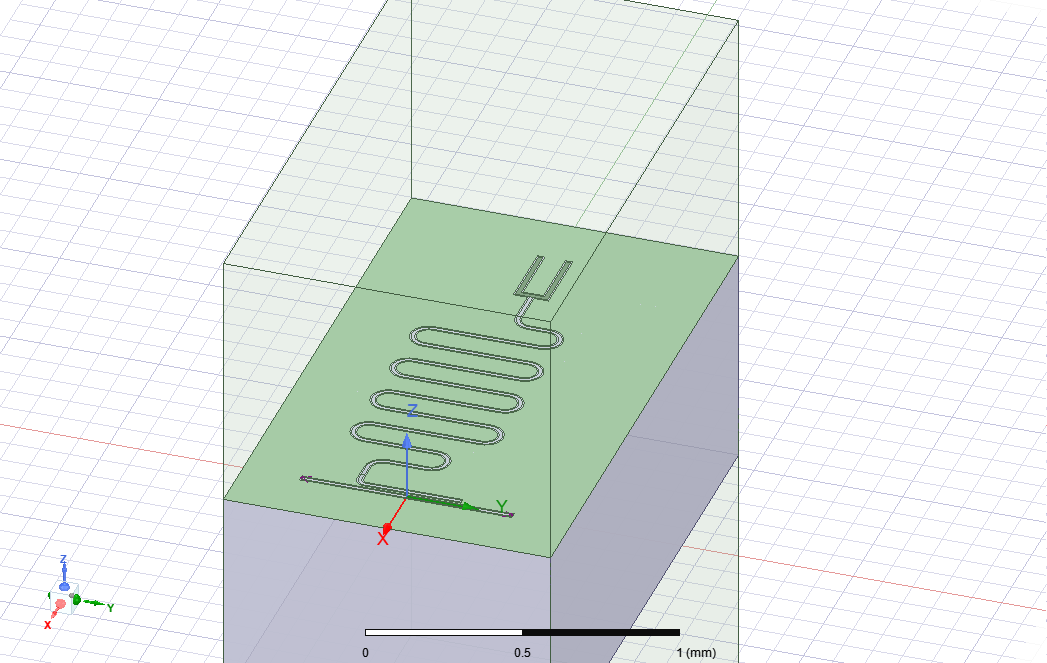

Design "CavitySweep_hfss" info:
	# eigenmodes    1
	# variations    1
Design "CavitySweep_hfss" info:
	# eigenmodes    1
	# variations    1
freq = 5.251 GHz
Q = 39143.6
kappa = 0.134 MHz


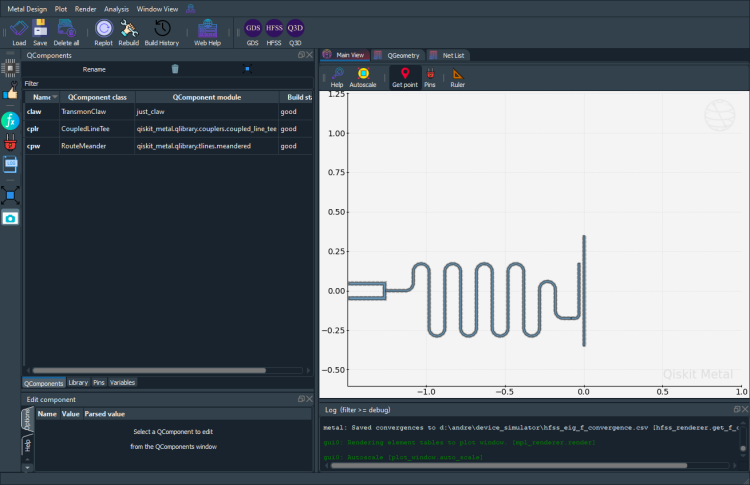

{'design': {'coupler_type': 'CLT',
  'design_options': {'claw_opts': {'connection_pads': {'readout': {'claw_cpw_length': '0um',
      'claw_cpw_width': '11.7um',
      'claw_gap': '5.1um',
      'claw_length': '220um',
      'claw_width': '15um',
      'connector_location': '90',
      'connector_type': '0',
      'ground_spacing': '4.1um'}},
    'orientation': '-90',
    'pos_x': '-1500um'},
   'cplr_opts': {'coupling_length': '350um',
    'coupling_space': '7.9um',
    'down_length': '50um',
    'open_termination': False,
    'orientation': '-90',
    'prime_gap': '5.1um',
    'prime_width': '11.7um',
    'second_gap': '5.1um',
    'second_width': '11.7um'},
   'cpw_opts': {'fillet': '49.9um',
    'lead': {'start_straight': '100um',
     'end_straight': '50um',
     'start_jogged_extension': {0: ['R90', '233.33333333333334um']}},
    'meander': {'spacing': '100um', 'asymmetry': '116.66666666666667um'},
    'pin_inputs': {'start_pin': {'component': 'cplr', 'pin': 'second_end'},
     '

In [19]:
results_df = simulate_single_design(design, gui, geometry_cavityclaw_dict, sim_options_cavityclaw_dict)
results_df

### Simulate the example Interdigitated Capacitor design

In [20]:
# Get the geometry Dict from our example device Dict
geometry_capn_dict = example_capn_device["design"]["design_options"]
geometry_capn_dict

{'cap_distance': '50.9um',
 'cap_gap': '2.1um',
 'cap_gap_ground': '5.1um',
 'cap_width': '4.9um',
 'finger_count': '1',
 'finger_length': '25.9um',
 'orientation': '-90',
 'prime_gap': '5.1um',
 'prime_width': '11.7um',
 'second_gap': '5.1um',
 'second_width': '11.7um'}

In [21]:
# Get the simulation parameters from our example device Dict
sim_options_capn_dict = example_capn_device["sim_options"]
sim_options_capn_dict

{'setup': {'auto_increase_solution_order': 'False',
  'enabled': True,
  'freq_ghz': 5.0,
  'max_passes': 15,
  'min_converged_passes': 2,
  'min_passes': 2,
  'name': 'lom_setup',
  'percent_error': 0.1,
  'percent_refinement': 30,
  'reuse_selected_design': False,
  'reuse_setup': False,
  'run': {'box_plus_buffer': True,
   'components': ['cplr'],
   'name': 'LOMv2.01',
   'open_terminations': [['cplr', 'second_end'],
    ['cplr', 'prime_start'],
    ['cplr', 'prime_end']]},
  'save_fields': False,
  'solution_order': 'Medium',
  'solver_type': 'Iterative'},
 'simulator': 'Ansys HFSS'}

the parameters ['run'] are unsupported, so they have been ignored


INFO 11:27PM [connect_design]: 	Opened active design
	Design:    LOMv2.01_q3d [Solution type: Q3D]
WARNING 11:27PM [connect_setup]: 	No design setup detected.
WARNING 11:27PM [connect_setup]: 	Creating Q3D default setup.
INFO 11:27PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 11:27PM [get_setup]: 	Opened setup `lom_setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 11:27PM [analyze]: Analyzing setup lom_setup


<COMObject GetModule>


INFO 11:28PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmp6_3ne5ea.txt, C, , lom_setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 11:28PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmp1s2l3nlq.txt, C, , lom_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 11:28PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmplaok05xm.txt, C, , lom_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 11:28PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpaw6en8or.txt, C, , lom_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 11:28PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpxeieqxmq.txt, C, , lom_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 4, False


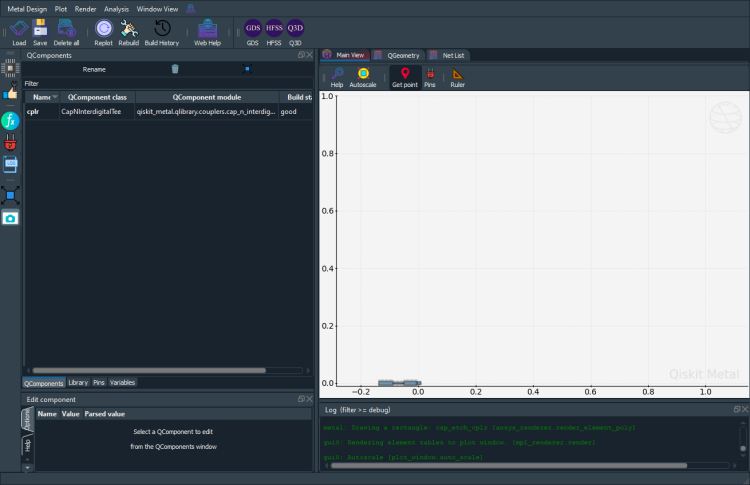

{'design': {'coupler_type': 'NCap',
  'design_options': {'cap_distance': '50.9um',
   'cap_gap': '2.1um',
   'cap_gap_ground': '5.1um',
   'cap_width': '4.9um',
   'finger_count': '1',
   'finger_length': '25.9um',
   'orientation': '-90',
   'prime_gap': '5.1um',
   'prime_width': '11.7um',
   'second_gap': '5.1um',
   'second_width': '11.7um'},
  'design_tool': 'Qiskit Metal'},
 'sim_options': {'sim_type': 'lom',
  'setup': {'name': 'lom_setup',
   'reuse_selected_design': False,
   'reuse_setup': False,
   'freq_ghz': 5.0,
   'save_fields': False,
   'enabled': True,
   'max_passes': 15,
   'min_passes': 2,
   'min_converged_passes': 2,
   'percent_error': 0.1,
   'percent_refinement': 30,
   'auto_increase_solution_order': 'False',
   'solution_order': 'Medium',
   'solver_type': 'Iterative',
   'run': {'name': 'LOMv2.01',
    'components': ['cplr'],
    'open_terminations': [('cplr', 'prime_start'),
     ('cplr', 'prime_end'),
     ('cplr', 'second_end')],
    'box_plus_buffer': T

In [22]:
results_df = simulate_single_design(design, gui, geometry_capn_dict, sim_options_capn_dict)
results_df

# Simulate an entire (CLT + CPW + TransmonCross) device

#### Use example CavityClaw and TransmonCross objects that are compatible with each other (`claw_gap`, `claw_length`, `claw_width` are the same in both)

In [17]:
test_cavityclaw = {'sim_options': {'setup': {'basis_order': 1,
   'max_delta_f': 0.05,
   'max_passes': 1, # THIS IS LOW FOR DEMONSTRATION PURPOSES
   'min_converged': 1,
   'min_converged_passes': 2,
   'min_freq_ghz': 1,
   'min_passes': 1,
   'n_modes': 1,
   'name': 'Setup',
   'pct_refinement': 30,
   'reuse_selected_design': True,
   'reuse_setup': True,
   'vars': {'Cj': '0fF', 'Lj': '0nH'}},
  'simulator': 'Ansys HFSS'},
 'sim_results': {'cavity_frequency': 5353549772.64,
  'kappa': 161106.5984292,
  'units': 'Hz'},
 'design': {'coupler_type': 'CLT',
  'design_options': {'claw_opts': {'connection_pads': {'readout': {'claw_cpw_length': '0um',
      'claw_cpw_width': '11.7um',
      'claw_gap': '5.1um',
      'claw_length': '160um',
      'claw_width': '15um',
      'connector_location': '90',
      'connector_type': '0',
      'ground_spacing': '4.1um'}},
    'orientation': '-90',
    'pos_x': '-1500um'},
   'cplr_opts': {'coupling_length': '350um',
    'coupling_space': '7.9um',
    'down_length': '50um',
    'open_termination': False,
    'orientation': '-90',
    'prime_gap': '5.1um',
    'prime_width': '11.7um',
    'second_gap': '5.1um',
    'second_width': '11.7um'},
   'cpw_opts': {'fillet': '49.9um',
    'lead': {'end_straight': None,
     'start_jogged_extension': None,
     'start_straight': '50um'},
    'meander': {'asymmetry': '-175.0um', 'spacing': '100um'},
    'pin_inputs': {'end_pin': {'component': 'claw', 'pin': 'readout'},
     'start_pin': {'component': 'cplr', 'pin': 'second_end'}},
    'total_length': '4700um',
    'trace_gap': '5.1um',
    'trace_width': '11.7um'}},
  'design_tool': 'qiskit-metal'},
 'contributor': {'PI': 'Eli Levenson-Falk, PhD',
  'date_created': '2023-12-01-170608',
  'group': 'LFL',
  'institution': 'USC',
  'uploader': 'Andre Kuo'},
 'notes': {}}

In [18]:
test_xmon = {'sim_results': {'claw_to_claw': 94.97421,
  'claw_to_ground': 90.86585,
  'cross_to_claw': 3.73363,
  'cross_to_cross': 158.40783,
  'cross_to_ground': 158.40783,
  'ground_to_ground': 311.2559,
  'units': 'nH'},
 'design': {'design_options': {'aedt_hfss_capacitance': 0,
   'aedt_hfss_inductance': 9.686e-09,
   'aedt_q3d_capacitance': 0,
   'aedt_q3d_inductance': 1e-08,
   'chip': 'main',
   'connection_pads': {'c': {'claw_cpw_length': '0um',
     'claw_cpw_width': '10um',
     'claw_gap': '5.1um',
     'claw_length': '160um',
     'claw_width': '15um',
     'connector_location': '90',
     'connector_type': '0',
     'ground_spacing': '10um'}},
   'cross_gap': '30um',
   'cross_length': '310um',
   'cross_width': '30um',
   'gds_cell_name': 'my_other_junction',
   'hfss_capacitance': 0,
   'hfss_inductance': 9.686e-09,
   'hfss_mesh_kw_jj': 7e-06,
   'hfss_resistance': 0,
   'layer': '1',
   'orientation': '-90',
   'pos_x': '-1500um',
   'pos_y': '1200um',
   'q3d_capacitance': 0,
   'q3d_inductance': '10nH',
   'q3d_mesh_kw_jj': 7e-06,
   'q3d_resistance': 0},
  'design_tool': 'qiskit-metal'},
 'notes': {},
 'contributor': {'PI': 'Eli Levenson-Falk, PhD',
  'date_created': '2023-09-20-142547',
  'group': 'LFL',
  'institution': 'USC',
  'uploader': 'Andre Kuo'},
 'sim_options': {'renderer_options': {'Cj': 0,
   'Lj': '10nH',
   '_Rj': 0,
   'design_name': None,
   'max_mesh_length_jj': '7um',
   'max_mesh_length_port': '7um',
   'plot_ansys_fields_options': {'AdjacentSidePlot': 'False',
    'FullModelPlot': 'False',
    'IntrinsicVar': "Phase='0deg'",
    'PlotFolder': 'E Field',
    'PlotGeomInfo_0': '1',
    'PlotGeomInfo_1': 'Surface',
    'PlotGeomInfo_2': 'FacesList',
    'PlotGeomInfo_3': '1',
    'QuantityName': 'Mag_E',
    'StreamlinePlot': 'False',
    'UserSpecifyFolder': '0',
    'UserSpecifyName': '0',
    'name': 'NAME:Mag_E1'},
   'project_name': None,
   'project_path': None,
   'wb_offset': '0um',
   'wb_size': 5,
   'wb_threshold': '400um',
   'x_buffer_width_mm': 0.2,
   'y_buffer_width_mm': 0.2},
  'setup': {'auto_increase_solution_order': True,
   'enabled': True,
   'freq_ghz': 5.0,
   'max_passes': 30,
   'min_converged_passes': 1,
   'min_passes': 2,
   'name': 'sweep_setup',
   'percent_error': 0.1,
   'percent_refinement': 30,
   'reuse_selected_design': False,
   'reuse_setup': False,
   'run': {'box_plus_buffer': True,
    'components': ['Q'],
    'name': 'sweep_v2.0',
    'open_terminations': [['Q', 'c']]},
   'save_fields': False,
   'solution_order': 'High',
   'solver_type': 'Iterative'},
  'simulator': 'Ansys HFSS'}}

Get the geometry dict for our test CavityClaw (CLT + CPW) object

In [19]:
test_cavityclaw_geometry = test_cavityclaw["design"]["design_options"]
test_cavityclaw_geometry

{'claw_opts': {'connection_pads': {'readout': {'claw_cpw_length': '0um',
    'claw_cpw_width': '11.7um',
    'claw_gap': '5.1um',
    'claw_length': '160um',
    'claw_width': '15um',
    'connector_location': '90',
    'connector_type': '0',
    'ground_spacing': '4.1um'}},
  'orientation': '-90',
  'pos_x': '-1500um'},
 'cplr_opts': {'coupling_length': '350um',
  'coupling_space': '7.9um',
  'down_length': '50um',
  'open_termination': False,
  'orientation': '-90',
  'prime_gap': '5.1um',
  'prime_width': '11.7um',
  'second_gap': '5.1um',
  'second_width': '11.7um'},
 'cpw_opts': {'fillet': '49.9um',
  'lead': {'end_straight': None,
   'start_jogged_extension': None,
   'start_straight': '50um'},
  'meander': {'asymmetry': '-175.0um', 'spacing': '100um'},
  'pin_inputs': {'end_pin': {'component': 'claw', 'pin': 'readout'},
   'start_pin': {'component': 'cplr', 'pin': 'second_end'}},
  'total_length': '4700um',
  'trace_gap': '5.1um',
  'trace_width': '11.7um'}}

Get the simulation setup options dict for our test CavityClaw

In [20]:
test_cavityclaw_sim_opts = test_cavityclaw["sim_options"]
test_cavityclaw_sim_opts

{'setup': {'basis_order': 1,
  'max_delta_f': 0.05,
  'max_passes': 1,
  'min_converged': 1,
  'min_converged_passes': 2,
  'min_freq_ghz': 1,
  'min_passes': 1,
  'n_modes': 1,
  'name': 'Setup',
  'pct_refinement': 30,
  'reuse_selected_design': True,
  'reuse_setup': True,
  'vars': {'Cj': '0fF', 'Lj': '0nH'}},
 'simulator': 'Ansys HFSS'}

Get the geometry dict for our test TransmonCross object

In [21]:
test_xmon_geometry = test_xmon["design"]["design_options"]
test_xmon_geometry

{'aedt_hfss_capacitance': 0,
 'aedt_hfss_inductance': 9.686e-09,
 'aedt_q3d_capacitance': 0,
 'aedt_q3d_inductance': 1e-08,
 'chip': 'main',
 'connection_pads': {'c': {'claw_cpw_length': '0um',
   'claw_cpw_width': '10um',
   'claw_gap': '5.1um',
   'claw_length': '160um',
   'claw_width': '15um',
   'connector_location': '90',
   'connector_type': '0',
   'ground_spacing': '10um'}},
 'cross_gap': '30um',
 'cross_length': '310um',
 'cross_width': '30um',
 'gds_cell_name': 'my_other_junction',
 'hfss_capacitance': 0,
 'hfss_inductance': 9.686e-09,
 'hfss_mesh_kw_jj': 7e-06,
 'hfss_resistance': 0,
 'layer': '1',
 'orientation': '-90',
 'pos_x': '-1500um',
 'pos_y': '1200um',
 'q3d_capacitance': 0,
 'q3d_inductance': '10nH',
 'q3d_mesh_kw_jj': 7e-06,
 'q3d_resistance': 0}

Get the simulation setup options for our test TransmonCross

In [22]:
test_xmon_sim_opts = test_xmon["sim_options"]
test_xmon_sim_opts

{'renderer_options': {'Cj': 0,
  'Lj': '10nH',
  '_Rj': 0,
  'design_name': None,
  'max_mesh_length_jj': '7um',
  'max_mesh_length_port': '7um',
  'plot_ansys_fields_options': {'AdjacentSidePlot': 'False',
   'FullModelPlot': 'False',
   'IntrinsicVar': "Phase='0deg'",
   'PlotFolder': 'E Field',
   'PlotGeomInfo_0': '1',
   'PlotGeomInfo_1': 'Surface',
   'PlotGeomInfo_2': 'FacesList',
   'PlotGeomInfo_3': '1',
   'QuantityName': 'Mag_E',
   'StreamlinePlot': 'False',
   'UserSpecifyFolder': '0',
   'UserSpecifyName': '0',
   'name': 'NAME:Mag_E1'},
  'project_name': None,
  'project_path': None,
  'wb_offset': '0um',
  'wb_size': 5,
  'wb_threshold': '400um',
  'x_buffer_width_mm': 0.2,
  'y_buffer_width_mm': 0.2},
 'setup': {'auto_increase_solution_order': True,
  'enabled': True,
  'freq_ghz': 5.0,
  'max_passes': 30,
  'min_converged_passes': 1,
  'min_passes': 2,
  'name': 'sweep_setup',
  'percent_error': 0.1,
  'percent_refinement': 30,
  'reuse_selected_design': False,
  'reu

Run a complete simulation of the CavityClaw and TransmonCross objects to obtain simulated values for [linear] cavity frequency $f_{res}$, qubit frequency $f_q$, coupling strength $g$, qubit anharmonicity $\alpha$, and linewidth $\kappa$ 

INFO 12:10AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:10AM [load_ansys_project]: 	Opened Ansys App
INFO 12:10AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 12:10AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/lfl/Documents/Ansoft/
	Project:   Project52


Starting the Simulation


INFO 12:10AM [connect_design]: 	Opened active design
	Design:    CavitySweep_hfss [Solution type: Eigenmode]
INFO 12:10AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:10AM [connect]: 	Connected to project "Project52" and design "CavitySweep_hfss" 😀 

INFO 12:10AM [connect_design]: 	Opened active design
	Design:    CavitySweep29 [Solution type: Eigenmode]
WARNING 12:10AM [connect_setup]: 	No design setup detected.
WARNING 12:10AM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:10AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


the parameters ['min_converged_passes'] are unsupported, so they have been ignored


INFO 12:10AM [connect_design]: 	Opened active design
	Design:    CavitySweep_hfss [Solution type: Eigenmode]


creaing porst
Sim rendered into HFSS!
{'mesh1': {'objects': ['prime_cpw_cplr', 'second_cpw_cplr', 'trace_cpw', 'readout_connector_arm_claw'], 'MaxLength': '7um'}}
pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path D:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path D:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


INFO:Global:Python version 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


pyaedt INFO: Project Project52 set to active.


INFO:Global:Project Project52 set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 12:11AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:11AM [analyze]: Analyzing setup test_setup
12:13AM 09s INFO [get_f_convergence]: Saved convergences to d:\andre\device_simulator\hfss_eig_f_convergence.csv


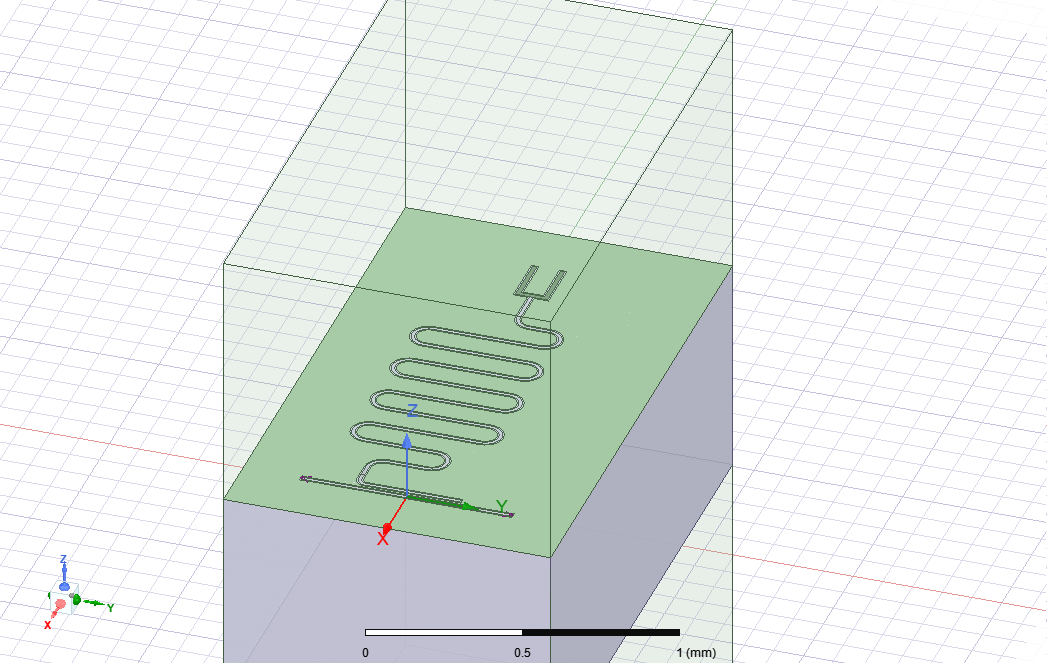

Design "CavitySweep_hfss" info:
	# eigenmodes    1
	# variations    1
Design "CavitySweep_hfss" info:
	# eigenmodes    1
	# variations    1


INFO 12:13AM [connect_project]: Connecting to Ansys Desktop API...


freq = 5.352 GHz
Q = 38783.1
kappa = 0.138 MHz
the parameters ['run'] are unsupported, so they have been ignored
{'pos_x': '-1500um', 'pos_y': '1200um', 'orientation': '-90', 'chip': 'main', 'layer': '1', 'connection_pads': {'c': {'connector_type': '0', 'claw_length': '160um', 'ground_spacing': '10um', 'claw_width': '15um', 'claw_gap': '5.1um', 'claw_cpw_length': '0um', 'claw_cpw_width': '10um', 'connector_location': '90'}}, 'cross_width': '30um', 'cross_length': '310um', 'cross_gap': '30um', 'hfss_inductance': 9.686e-09, 'hfss_capacitance': 0, 'hfss_resistance': 0, 'hfss_mesh_kw_jj': 7e-06, 'q3d_inductance': '10nH', 'q3d_capacitance': 0, 'q3d_resistance': 0, 'q3d_mesh_kw_jj': 7e-06, 'gds_cell_name': 'my_other_junction', 'aedt_q3d_inductance': 1e-08, 'aedt_q3d_capacitance': 0, 'aedt_hfss_inductance': 9.686e-09, 'aedt_hfss_capacitance': 0}


INFO 12:13AM [load_ansys_project]: 	Opened Ansys App
INFO 12:13AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 12:13AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/lfl/Documents/Ansoft/
	Project:   Project52
INFO 12:13AM [connect_design]: 	Opened active design
	Design:    CavitySweep_hfss [Solution type: Eigenmode]
INFO 12:13AM [get_setup]: 	Opened setup `test_setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:13AM [connect]: 	Connected to project "Project52" and design "CavitySweep_hfss" 😀 

INFO 12:13AM [connect_design]: 	Opened active design
	Design:    LOMv2.0_q3d17 [Solution type: Q3D]
WARNING 12:13AM [connect_setup]: 	No design setup detected.
WARNING 12:13AM [connect_setup]: 	Creating Q3D default setup.
INFO 12:13AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 12:13AM [get_setup]: 	Opened setup `sweep_setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)


<COMObject GetModule>


INFO 12:13AM [analyze]: Analyzing setup sweep_setup
INFO 12:15AM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpvrwad38y.txt, C, , sweep_setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 12:15AM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmp369tlzlk.txt, C, , sweep_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 12:15AM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpou_4cugw.txt, C, , sweep_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 12:15AM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpi6vhszr8.txt, C, , sweep_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 12:15AM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpa90g2njc.txt, C, , sweep_setup:AdaptivePass, "Origin

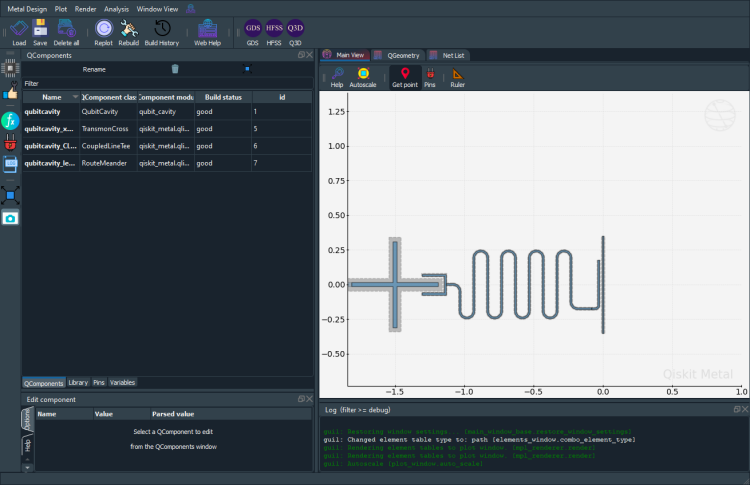

{'sim_options': {'setup': {'eigenmode_setup': {'setup': {'basis_order': 1,
     'max_delta_f': 0.05,
     'max_passes': 1,
     'min_converged': 1,
     'min_converged_passes': 2,
     'min_freq_ghz': 1,
     'min_passes': 1,
     'n_modes': 1,
     'name': 'Setup',
     'pct_refinement': 30,
     'reuse_selected_design': True,
     'reuse_setup': True,
     'vars': {'Cj': '0fF', 'Lj': '0nH'}},
    'simulator': 'Ansys HFSS'},
   'LOM_setup': {'renderer_options': {'Cj': 0,
     'Lj': '10nH',
     '_Rj': 0,
     'design_name': None,
     'max_mesh_length_jj': '7um',
     'max_mesh_length_port': '7um',
     'plot_ansys_fields_options': {'AdjacentSidePlot': 'False',
      'FullModelPlot': 'False',
      'IntrinsicVar': "Phase='0deg'",
      'PlotFolder': 'E Field',
      'PlotGeomInfo_0': '1',
      'PlotGeomInfo_1': 'Surface',
      'PlotGeomInfo_2': 'FacesList',
      'PlotGeomInfo_3': '1',
      'QuantityName': 'Mag_E',
      'StreamlinePlot': 'False',
      'UserSpecifyFolder': '0',
  

In [23]:
result_df = simulate_whole_device(design, test_xmon_geometry, test_cavityclaw_geometry, test_xmon_sim_opts, test_cavityclaw_sim_opts)
result_df